In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
car_data=pd.read_csv('/content/CarPrice_Assignment.csv')
car_data.head()
{"type":"dataframe","variable_name":"car_data"}
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

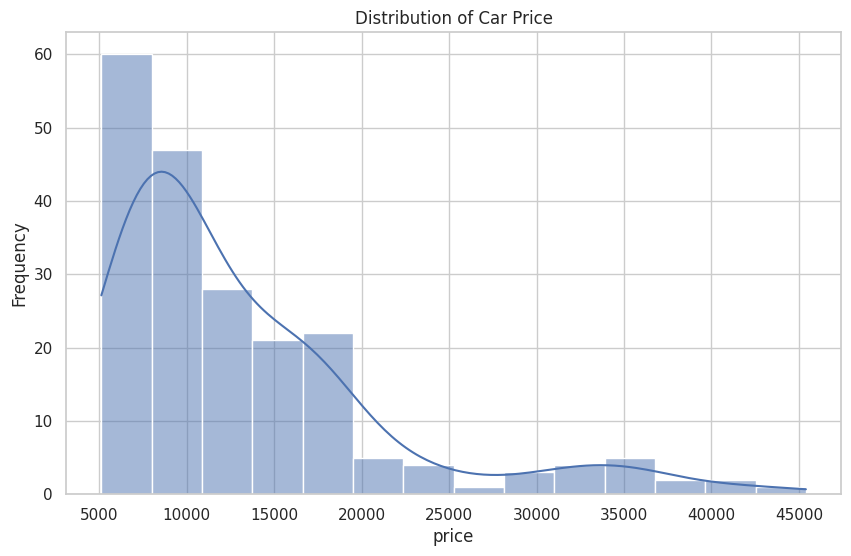

<Figure size 1400x1000 with 0 Axes>

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(car_data['price'],kde=True)
plt.title('Distribution of Car Price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(14,10))
numeric_data=car_data.select_dtypes(include=['number'])
corr_matrix=numeric_data.corr()


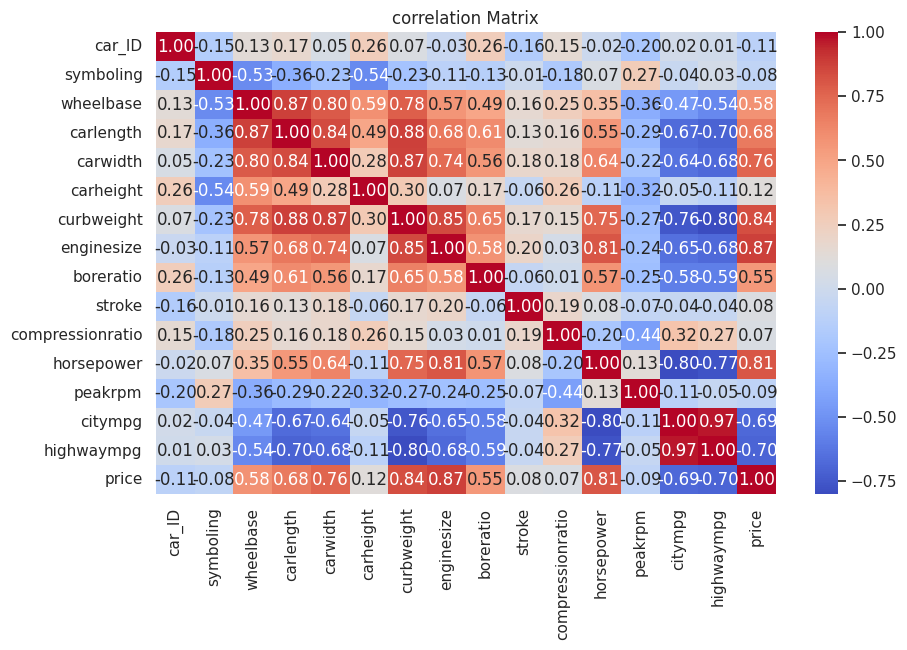

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation Matrix')
plt.show()


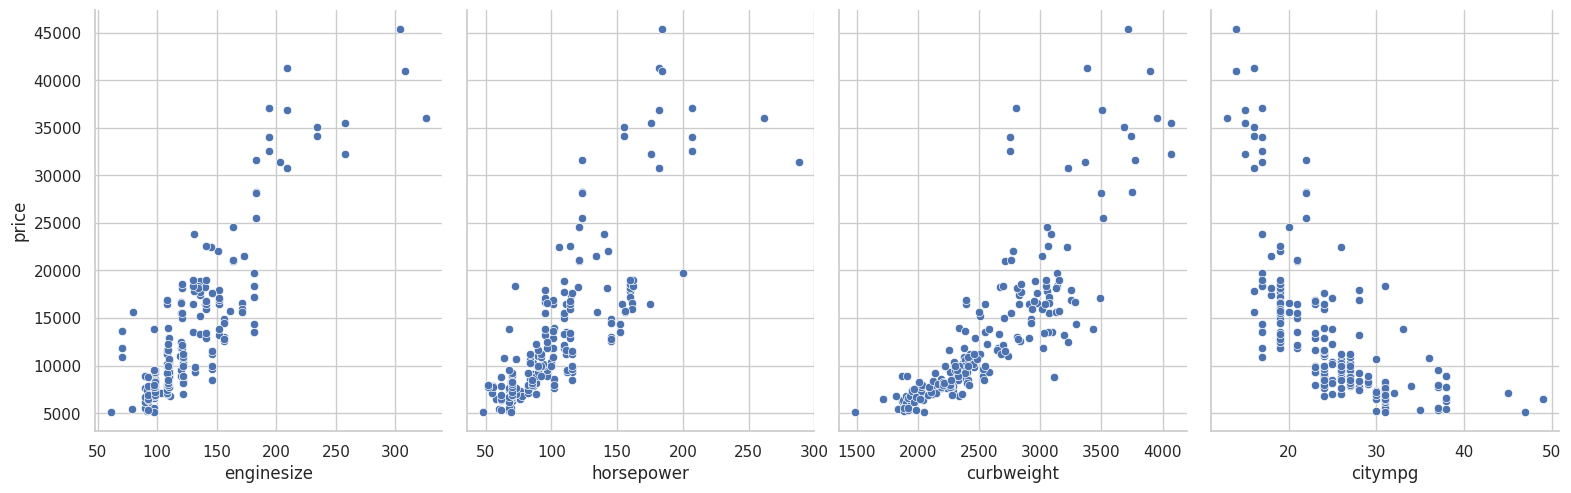

In [13]:
sns.pairplot(car_data,x_vars=['enginesize','horsepower','curbweight','citympg'],y_vars='price',height=5,aspect=0.8)
plt.show()

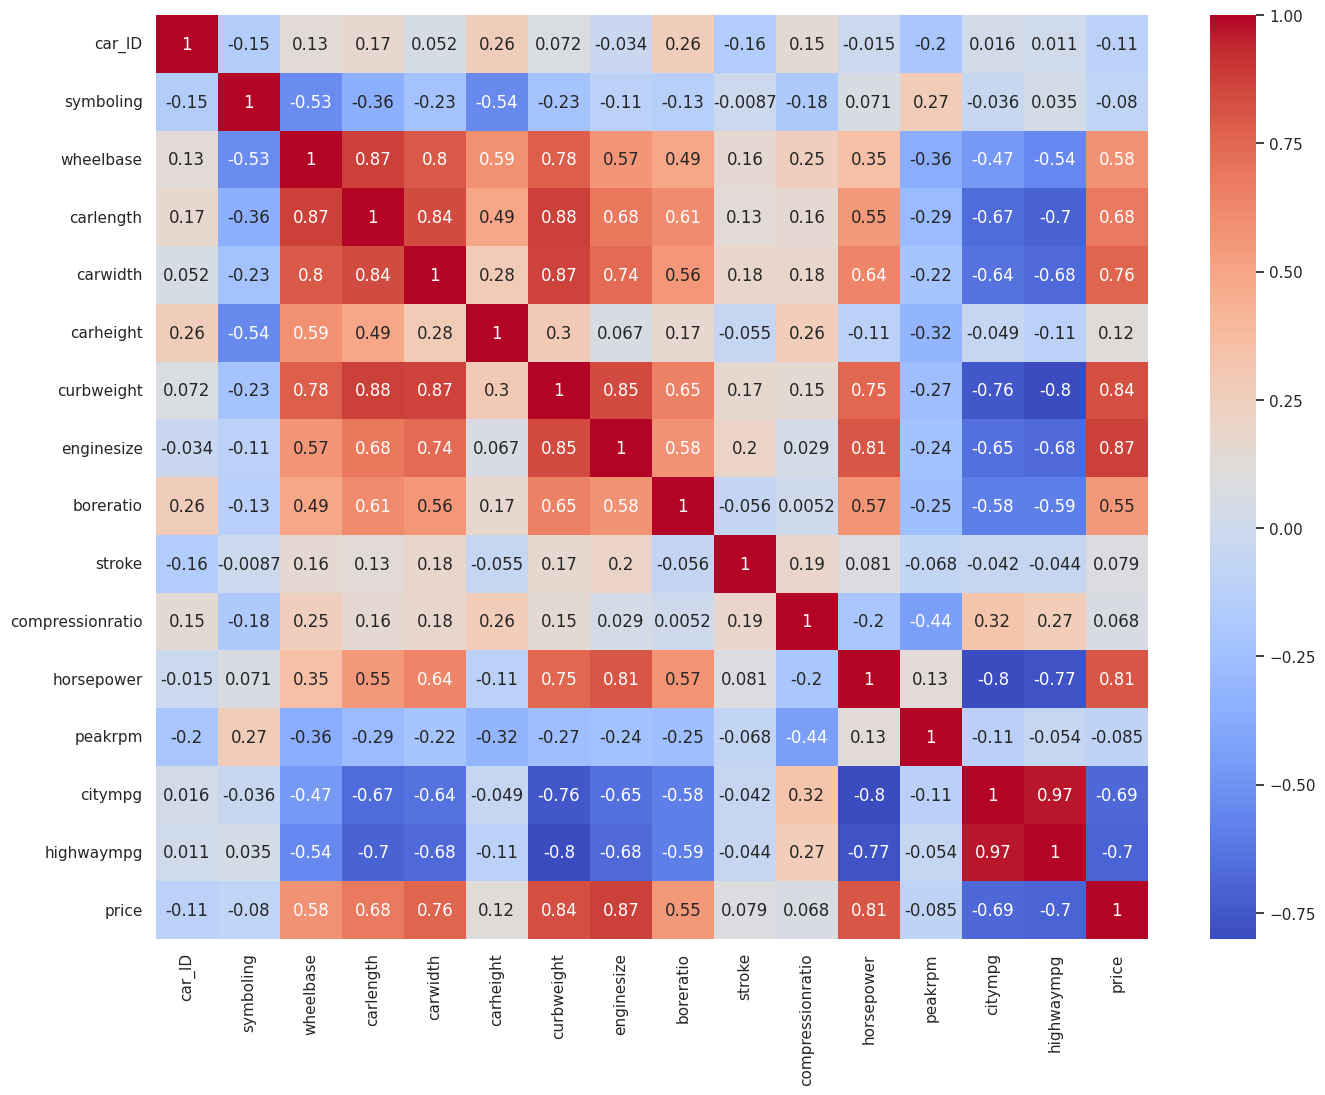

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = car_data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Mean Squared Error: 178507387.43178862
R^2 Score: -1.261189453523091


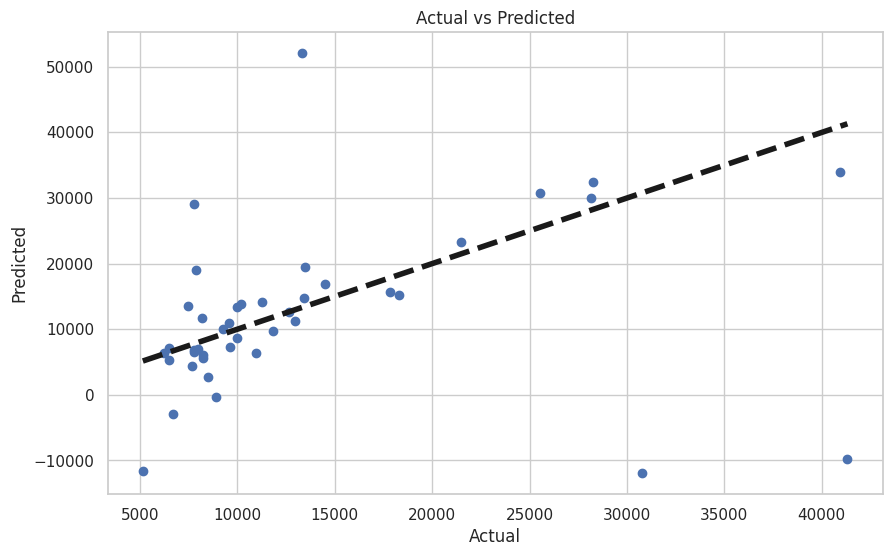

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
non_numeric_cols = car_data.select_dtypes(exclude=['number']).columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(car_data[non_numeric_cols])
encoded_df = pd.DataFrame(encoded_data,
columns=encoder.get_feature_names_out(non_numeric_cols))
car_data_encoded = car_data.drop(non_numeric_cols, axis=1)
car_data_encoded = pd.concat([car_data_encoded, encoded_df], axis=1)
X = car_data_encoded.drop('price', axis=1)
y = car_data_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
coefficients = pd.DataFrame(model.coef_, X.columns,
columns=['Coefficient'])
coefficients
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [25]:
car_data.info()
car_data.describe()
missing_values = car_data.isnull().sum()
missing_values[missing_values > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Series([], dtype: int64)

In [29]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoders = {}
categorical_columns =car_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
 le = LabelEncoder()
 car_data[col] = le.fit_transform(car_data[col])
 label_encoders[col] = le
scaler = StandardScaler()
numerical_columns = car_data.select_dtypes(include=['float64',
'int64']).columns
car_data[numerical_columns] =scaler.fit_transform(car_data[numerical_columns])
car_data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-1.723622,1.743470,-1.838221,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,...,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,-1.706724,1.743470,-1.813780,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,...,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,-1.689826,0.133509,-1.862662,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.708596,...,0.604046,0.869568,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,-1.672928,0.938490,-1.789339,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.173698,...,-0.431076,0.869568,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,-1.656029,0.938490,-1.764897,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.107110,...,0.218885,0.869568,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668
